<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Load-of-packages-and-data" data-toc-modified-id="Load-of-packages-and-data-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Load of packages and data</a></span></li></ul></li><li><span><a href="#Prepare-data" data-toc-modified-id="Prepare-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Prepare data</a></span></li><li><span><a href="#10-port-sorted-after-backward-beta" data-toc-modified-id="10-port-sorted-after-backward-beta-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>10 port sorted after backward beta</a></span></li></ul></div>

### Load of packages and data

In [1]:
%load_ext autoreload
%autoreload 2

"""
Load relevant packages 
"""
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
import pandas_datareader as pdr
import datetime
from sklearn.linear_model import LinearRegression
import seaborn as sns
import pickle
from scipy.stats import kurtosis
from scipy.stats import skew
from typing import Union, List
import math as m
from sklearn import datasets, linear_model
import statsmodels.api as sm

In [2]:
"""
Set path to get save data
"""
path = "/Users/julielaustsen/Desktop/OneDrive/UNI/Speciale /Data/Eikon"
os.chdir(path) 

In [3]:
"""
Load saved dataframes and dictionareis
"""
with open('data_calc_win', 'rb') as data_dict_win:
    data_calc_win = pickle.load(data_dict_win) 

with open('regress_calc', 'rb') as regress: #load backward beta
    regress_calc = pickle.load(regress)
    
with open('regress_calc_for', 'rb') as regress_for: #load forward beta
    regress_calc_for = pickle.load(regress_for)
    
with open('data_nan_re', 'rb') as data_nan: #original data to get deposits
    data_nan_re = pickle.load(data_nan)

## Prepare data

In [4]:
"""
To get the same columns names in each dataframe
"""
columns_list = ['Market Value', 'Return', 'Excess Return', 'Book Equity', 'Book Leverage ratio', 'Book Equity ratio', 'Book Equity/RWA', 'Tier 1 ratio','Tier 1/RWA','Total Assets','Total Risk Weighted Assets']

for i in data_calc_win.keys():
    data_calc_win[i].columns = columns_list

In [5]:
"""
We save all the variables we need
"""
main_dict = {}
main_dict = data_calc_win.copy()

for i in data_calc_win.keys():
    main_dict[i].drop(columns=['Return', 'Book Equity', 'Book Leverage ratio', 'Book Equity ratio', 'Book Equity/RWA', 'Tier 1 ratio','Tier 1/RWA','Total Risk Weighted Assets' ])
    main_dict[i]['Backward beta'] = np.array(regress_calc[i]['Beta'])
    main_dict[i]['Forward beta'] = np.array(regress_calc_for[i]['Beta'])
    main_dict[i]['Deposit ratio'] = data_nan_re[i].iloc[:,4] / main_dict[i]['Total Assets']

for i in main_dict.keys():
    main_dict[i] = main_dict[i].drop(columns=['Return', 'Book Equity', 'Book Leverage ratio', 'Book Equity ratio', 'Book Equity/RWA', 'Tier 1 ratio','Tier 1/RWA','Total Risk Weighted Assets' ])

In [6]:
"""
We drop the first 12 obs because we know beta value = nan
"""

main_dict_back = main_dict.copy()

for i in main_dict_back.keys():
    main_dict_back[i].reset_index(inplace=True)
    main_dict_back[i] = main_dict_back[i].drop([0,1,2,3,4,5,6,7,8,9,10,11])

In [7]:
"""
Only includes the observations where we have a deposit value
"""
main_dict_back_nan = main_dict_back.copy()

for i in main_dict_back_nan.keys():
    main_dict_back_nan[i] = main_dict_back_nan[i][~main_dict_back_nan[i].iloc[:,-1].isna()]

In [8]:
"""
Create dataframes that containes all our backward betas.
"""

backward = pd.concat([main_dict_back_nan[i]['Backward beta'] for i in list(main_dict_back_nan.keys())], axis=1)

backward.columns = list(main_dict_back_nan.keys())


## 10 port sorted after backward beta

In [9]:
"""
Sorting banks into 10 groups equal sized groups
"""

group1, group2, group3, group4, group5, group6, group7, group8, group9, group10 = {},{},{},{},{},{},{},{},{},{}

no_obs_backward = backward.shape[0]

for i in range(no_obs_backward):
        no_backward = backward.iloc[i,:].count()
        no_group1, no_group2, no_group3, no_group4, no_group5, no_group6, no_group7, no_group8, no_group9 = m.floor(no_backward*0.1), m.floor(no_backward*0.1), m.floor(no_backward*0.1), m.floor(no_backward*0.1), m.floor(no_backward*0.1), m.floor(no_backward*0.1), m.floor(no_backward*0.1), m.floor(no_backward*0.1), m.floor(no_backward*0.1)
        no_group10 = no_backward - (no_group1 + no_group2 + no_group3 + no_group4 + no_group5 + no_group6 + no_group7 + no_group8 + no_group9)
        
        group1[i]=list(backward.iloc[i,:].sort_values()[:no_group1].index)
        group2[i]=list(backward.iloc[i,:].sort_values()[no_group1:no_group1+no_group2].index)
        group3[i]=list(backward.iloc[i,:].sort_values()[no_group1+no_group2:no_group1+no_group2+no_group3].index)
        group4[i]=list(backward.iloc[i,:].sort_values()[no_group1+no_group2+no_group3:no_group1+no_group2+no_group3+no_group4].index)        
        group5[i]=list(backward.iloc[i,:].sort_values()[no_group1+no_group2+no_group3+no_group4:no_group1+no_group2+no_group3+no_group4+no_group5].index)
        group6[i]=list(backward.iloc[i,:].sort_values()[no_group1+no_group2+no_group3+no_group4+no_group5:no_group1+no_group2+no_group3+no_group4+no_group5+no_group6].index)
        group7[i]=list(backward.iloc[i,:].sort_values()[no_group1+no_group2+no_group3+no_group4+no_group5+no_group6:no_group1+no_group2+no_group3+no_group4+no_group5+no_group6+no_group7].index)
        group8[i]=list(backward.iloc[i,:].sort_values()[no_group1+no_group2+no_group3+no_group4+no_group5+no_group6+no_group7:no_group1+no_group2+no_group3+no_group4+no_group5+no_group6+no_group7+no_group8].index)
        group9[i]=list(backward.iloc[i,:].sort_values()[no_group1+no_group2+no_group3+no_group4+no_group5+no_group6+no_group7+no_group8:no_group1+no_group2+no_group3+no_group4+no_group5+no_group6+no_group7+no_group8+no_group9].index)
        group10[i]=list(backward.iloc[i,:].sort_values()[no_group1+no_group2+no_group3+no_group4+no_group5+no_group6+no_group7+no_group8+no_group9:no_backward].index)

In [10]:
"""
Creating a dictionary that contains the group sorting of backward beta
"""
group_dict = {}
group_dict[0] = group1
group_dict[1] = group2
group_dict[2] = group3
group_dict[3] = group4
group_dict[4] = group5
group_dict[5] = group6
group_dict[6] = group7
group_dict[7] = group8
group_dict[8] = group9
group_dict[9] = group10

In [11]:
"""
Assigning values to each timestep to each group (sorted according to backward beta)
"""

dict_backward = {}

for g in group_dict.keys():
    dict_backward[g] = {}
     
    for i in group_dict[g].keys():
        df = pd.DataFrame(columns=group_dict[g][i])
        for j in df.columns:
            s1 = main_dict_back[j].iloc[i,1].copy() #market value
            s2 = main_dict_back[j].iloc[i,2].copy() #excess return
            s3 = main_dict_back[j].iloc[i,6].copy() #deposit ratio
            df[j] = [s1,s2,s3]
        dict_backward[g][i] = df.T
        dict_backward[g][i].columns = ['Market value', 'Excess return', 'Deposit ratio']

In [12]:
"""
Calculate weight, equal & value weighted excess returns and deposit ratio for each of the 10 groups
"""
#assigning weights
for i in dict_backward.keys():
    for j in range(len(dict_backward[i])):
        dict_backward[i][j]['weight'] = dict_backward[i][j].iloc[:,0]/(dict_backward[i][j]['Market value'].sum())

#calculating weighted excess returns and deposit ratio
backward_val = {}

for i in dict_backward.keys():
    backward_val[i] = pd.DataFrame(columns=['ew_excess_ret', 'ew_deposit_ratio', 'vw_excess_ret', 'vw_deposit_ratio'])
    for j in range(len(dict_backward[i])):
            backward_val[i].loc[j,'ew_excess_ret'] = (dict_backward[i][j]['Excess return']*(1/len(dict_backward[i][j]))).sum()
            backward_val[i].loc[j,'ew_deposit_ratio'] = (dict_backward[i][j]['Deposit ratio']*(1/len(dict_backward[i][j]))).sum()
            backward_val[i].loc[j,'vw_excess_ret'] = (dict_backward[i][j]['Excess return']*dict_backward[i][j]['weight']).sum()
            backward_val[i].loc[j,'vw_deposit_ratio'] = (dict_backward[i][j]['Deposit ratio']*dict_backward[i][j]['weight']).sum()

In [13]:
"""
Creating a dataframe the summerize mean values of deposit ratio
"""
descriptive20 = pd.DataFrame(columns = ['Equal weighted - deposit ratio', 'Value weighted - deposit ratio'])

for i in range(10):
    descriptive20.loc[i+1,'Equal weighted - deposit ratio'] = '{:,.03f}'.format(backward_val[i]['ew_deposit_ratio'].mean())
    descriptive20.loc[i+1,'Value weighted - deposit ratio'] = '{:,.03f}'.format(backward_val[i]['vw_deposit_ratio'].mean())

descriptive20.loc['10-1','Equal weighted - deposit ratio'] = '{:,.03f}'.format(backward_val[9]['ew_deposit_ratio'].mean()-backward_val[0]['ew_deposit_ratio'].mean())
descriptive20.loc['10-1','Value weighted - deposit ratio'] = '{:,.03f}'.format(backward_val[9]['vw_deposit_ratio'].mean()-backward_val[0]['vw_deposit_ratio'].mean())


In [14]:
descriptive20.reset_index(inplace=True) #we reset the index so we can give it a name
descriptive20.rename(columns = {'index':'Backward beta sorted'})

,Backward beta sorted,Equal weighted - deposit ratio,Value weighted - deposit ratio
0,1,0.561,0.458
1,2,0.582,0.506
2,3,0.581,0.519
3,4,0.567,0.487
4,5,0.530,0.457
5,6,0.503,0.438
6,7,0.472,0.440
7,8,0.472,0.431
8,9,0.474,0.432
9,10,0.471,0.424


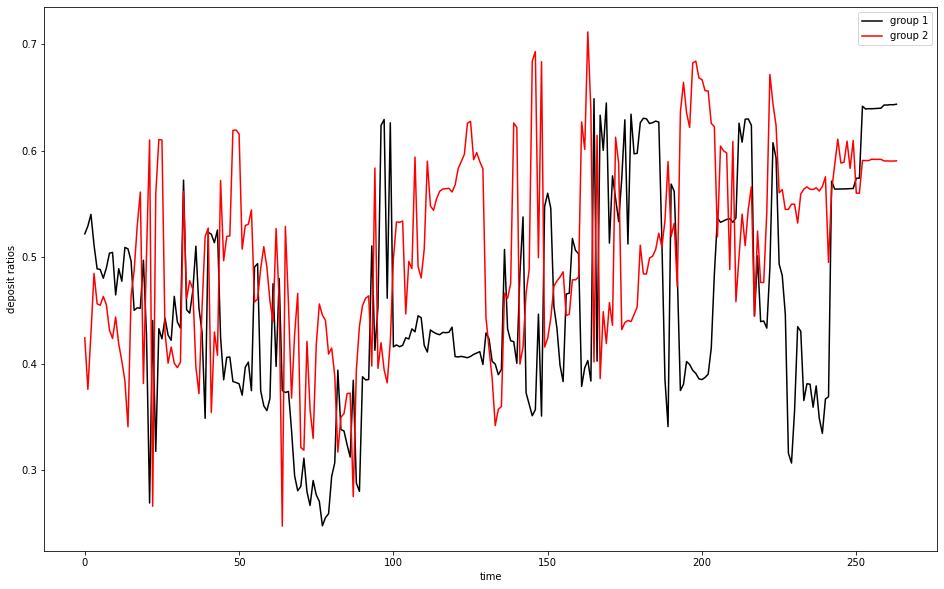

In [15]:
"""
Here we plot the desposit ratio for group 1 and 2 in order to see how it develops through time (VALUE WEIGHTED)
""" 
fig, ax = plt.subplots(1, 1,figsize=(16,10))
ax.plot(backward_val[0].index,backward_val[0]['vw_deposit_ratio'], color='black', label='group 1')
ax.plot(backward_val[1].index,backward_val[1]['vw_deposit_ratio'], color='red', label='group 2')
ax.set_ylabel('deposit ratios')
ax.set_xlabel('time')
ax.legend();